In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/TimeSereisDatasets/Ex-8/Copy of daily-website-visitors.csv')


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(int)
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)


ts = df['Unique.Visits']

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.475968574445403
p-value: 0.0002172640930008033
Critical Values: {'1%': np.float64(-3.4334094211542983), '5%': np.float64(-2.8628915360971003), '10%': np.float64(-2.5674894918770197)}


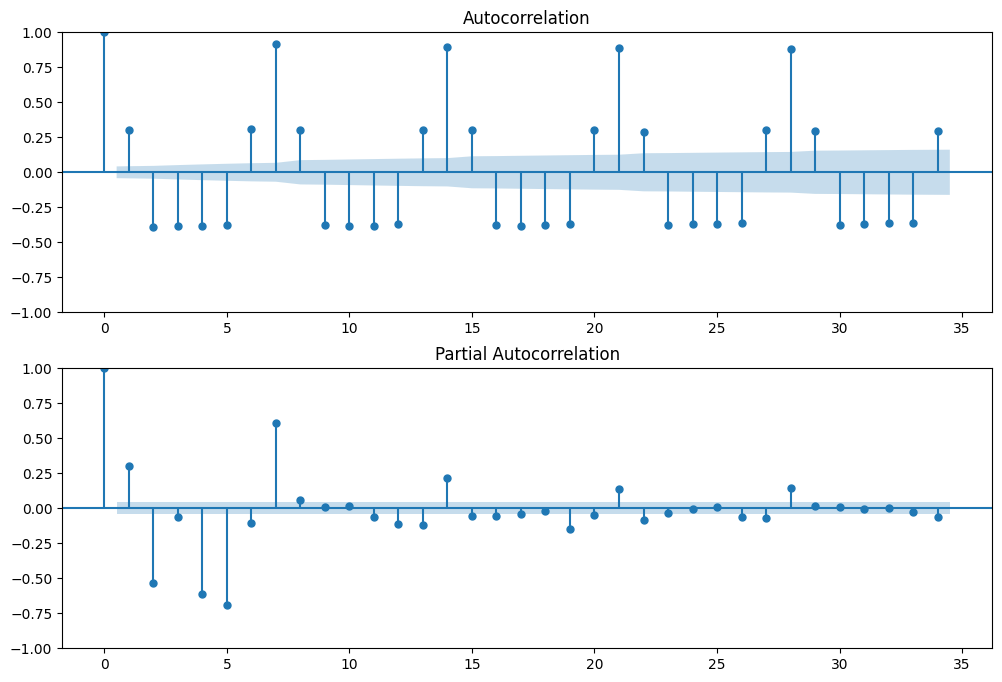

In [5]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(ts.diff().dropna(), ax=ax1)
plot_pacf(ts.diff().dropna(), ax=ax2)
plt.show()

In [6]:

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]


model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:          Unique.Visits   No. Observations:                 1733
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13150.690
Date:                Thu, 17 Apr 2025   AIC                          26311.381
Time:                        08:21:10   BIC                          26338.666
Sample:                    09-14-2014   HQIC                         26321.473
                         - 06-12-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6662      0.031     21.369      0.000       0.605       0.727
ar.L2         -0.4924      0.029    -16.746      0.000      -0.550      -0.435
ma.L1         -0.3821      0.035    -10.983      0.0

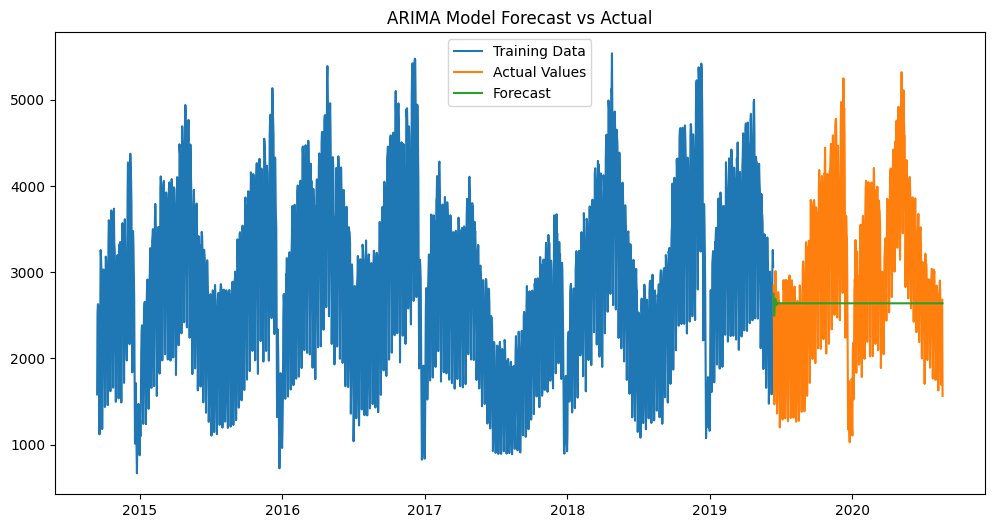

Test RMSE: 986.33


In [7]:

forecast = model_fit.forecast(steps=len(test))


plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Values')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Model Forecast vs Actual')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Test RMSE: {rmse:.2f}')

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarima_model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,7))
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())


sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f'SARIMA Test RMSE: {sarima_rmse:.2f}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                       Unique.Visits   No. Observations:                 1733
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood              -11736.742
Date:                             Thu, 17 Apr 2025   AIC                          23487.485
Time:                                     08:21:57   BIC                          23525.655
Sample:                                 09-14-2014   HQIC                         23501.605
                                      - 06-12-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1804      0.030     39.076      0.000       1.121       1.240
ar.L2         -0.8677      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


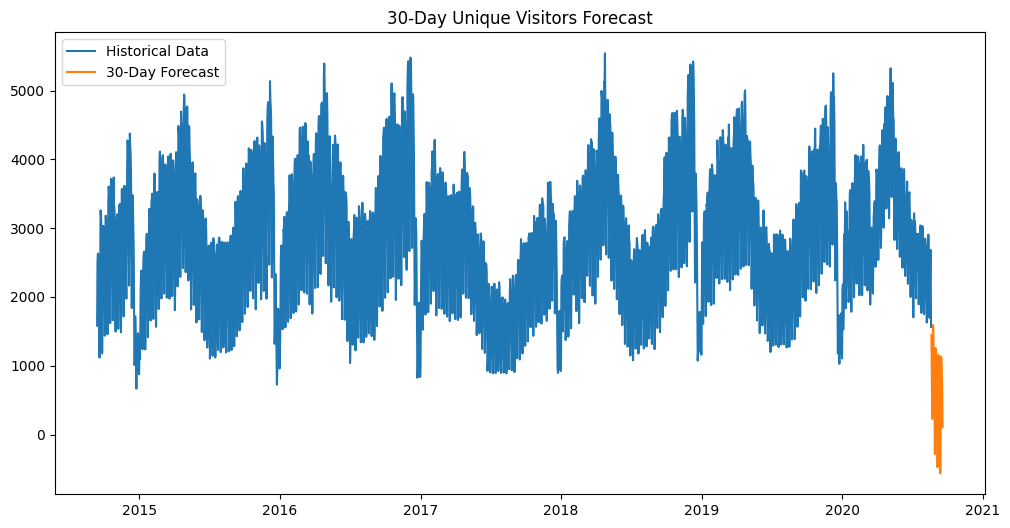

In [9]:

final_model = SARIMAX(ts, order=(2,1,2), seasonal_order=(1,1,1,7))
final_fit = final_model.fit()


forecast_days = 30
forecast = final_fit.forecast(steps=forecast_days)


plt.figure(figsize=(12,6))
plt.plot(ts.index, ts, label='Historical Data')
plt.plot(pd.date_range(ts.index[-1], periods=forecast_days+1)[1:], forecast, label='30-Day Forecast')
plt.title('30-Day Unique Visitors Forecast')
plt.legend()
plt.show()